# Bar Chart Examples

Specify and plot bar charts per requirements laid out at [The Data Visualization Catalogue Blog](https://datavizcatalogue.com/blog/new-format-for-the-bar-chart-reference-page/)

## Plot a Dictionary with a Predefined Formatter

In [1]:
from bar import bar
from formatters import money_formatter, thousands_formatter

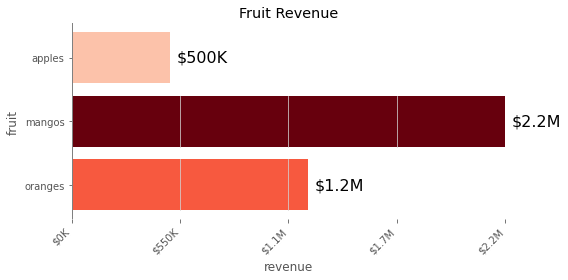

In [2]:
data = dict(apples=500000,
                oranges=1200000,
                mangos=2200005)

fig, ax = bar(data,
              x_label='revenue',
              y_label='fruit',
              title='Fruit Revenue',
              sort='alpha',
              in_bar_labels=False,
              formatter=money_formatter)

In [3]:
ax.get_yaxis().get_majorticklabels()[0]._text

'oranges'

# Plot Data Dictionary from API Request and Use a Custom Formatter

In [3]:
from dotenv import find_dotenv, load_dotenv
import os
import requests
from typing import Union

def get_vax_data(cbsa: str, API_KEY: str) -> Union[dict, None]:
    """fetch vaccine data from https://covidactnow.org/data-api per cbsa code"""
    r = requests.get('https://api.covidactnow.org/v2/cbsa/'+cbsa+'.json?apiKey=' + API_KEY)
    if r.status_code != 200:
        print(f'things seem non-normal: {r.status_code=}')
        return None
    response_json = r.json()
    return {'population': response_json['population'],
            'at least one shot': response_json['actuals']['vaccinationsInitiated'],
            'fully vaccinated': response_json['actuals']['vaccinationsCompleted']
            }

In [4]:
# load API KEY for Covid Act Now API from .env file, set params, get data
load_dotenv(find_dotenv())
API_KEY = os.environ.get("API_KEY")
madison_cbsa_code = '31540'
vax_data = get_vax_data(madison_cbsa_code, API_KEY)

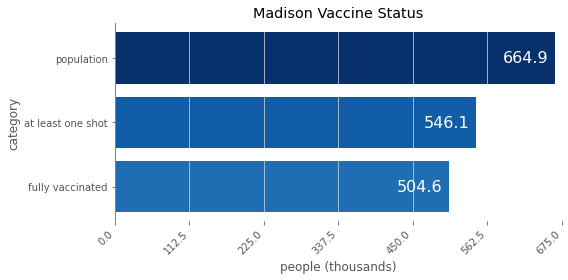

In [41]:
fig, ax = bar(vax_data,
              x_label = 'people (thousands)',
              y_label = 'category',
              title = 'Madison Vaccine Status',
              axis_limit= 675000,
              sort='values',
              tick_count = 7,
              cmap_name='Blues',
              formatter=thousands_formatter)